## Tugas 1 - Klasifikasi Citra

1. Import library yang diperlukan
2. Load dan unzip data rps.zip dari link dataset yang diberikan
2. Lakukan splitting folder yang mencakup folder train, val, dan test
3. Melakukan Exploration Data Analyst
4. Lakukan Pre-processing dan Data Augmentation yang menurut kamu memberikan dataset yang lebih efisien
5. Implementasikan model transfer learning dengan pre-trained architectures models yang anda inginkan menggunakan Tensorflow Keras, PyTorch ataupun lainnya
6. Lakukan Fit Model dengan epoch yang anda tentukan
7. Evaluate Model dengan menampilkan Plot, Loss, Accuracy serta Classification Report
8. Pilih 10 gambar secara acak pada data test hasil splitting kemudian lakukan predict. Tunjukkan hasilnya kepada asisten.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import splitfolders
import zipfile
import random
import os
import cv2
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics
import seaborn as sns

In [12]:
datasetPath = r"D:\Semester 7\Prak ML B\Modul 5\Images\rps"

In [13]:
# list class dalam dataset
classes = os.listdir(datasetPath)
num_classes = len(classes)
print(f"{num_classes} classes consisiting of: {classes}")

3 classes consisiting of: ['paper', 'rock', 'scissors']


In [14]:
# initialize each classes with a variable to the directory
paper_path = os.path.join(datasetPath, classes[0])
rock_path = os.path.join(datasetPath, classes[1])
scissors_path = os.path.join(datasetPath, classes[2])

In [15]:
# Split data menjadi train, val, test
splitfolders.ratio(datasetPath, output= r"D:\Semester 7\Prak ML B\Modul 5\Images\rps\rps_split", seed=42, ratio=(.7,.25,.05), group_prefix=None, move=False)

Copying files: 2520 files [00:01, 2340.35 files/s]


In [16]:
# get all the images from each class
paper_imgs = os.listdir(paper_path)
paper_imgs = [file for file in paper_imgs if file.endswith(('png', 'jpg', 'jpeg', 'gif'))]
rock_imgs = os.listdir(rock_path)
rock_imgs = [file for file in rock_imgs if file.endswith(('png', 'jpg', 'jpeg', 'gif'))]
scissors_imgs = os.listdir(scissors_path)
scissors_imgs = [file for file in scissors_imgs if file.endswith(('png', 'jpg', 'jpeg', 'gif'))]

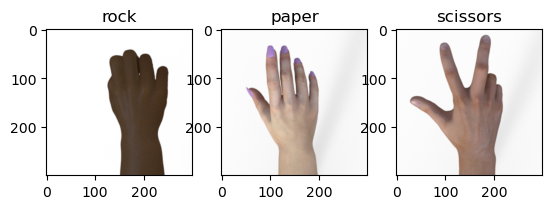

In [17]:
# display a random image from each class
paper_random = random.choice(paper_imgs)
rock_random = random.choice(rock_imgs)
scissors_random = random.choice(scissors_imgs)

rock_image = os.path.join(rock_path, rock_random)
paper_image = os.path.join(paper_path, paper_random)
scissors_image = os.path.join(scissors_path, scissors_random)

plt.subplot(1, 3, 1)
plt.title("rock")
image = plt.imread(rock_image)
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.title("paper")
image = plt.imread(paper_image)
plt.imshow(image)

plt.subplot(1, 3, 3)
plt.title("scissors")
image = plt.imread(scissors_image)
plt.imshow(image)

In [18]:
path_split = r"D:\Semester 7\Prak ML B\Modul 5\Images\rps\rps_split"

In [19]:
# Menentukan masing-masing path
train_path = os.path.join(path_split,"train")
val_path = os.path.join(path_split,"val")
test_path = os.path.join(path_split,"test")

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.5, shear_range=0.2, zoom_range=0.2, rotation_range=20, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.5)

In [35]:
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.5, shear_range=0.2, zoom_range=0.2,
                                   rotation_range=20, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.5)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    classes=['paper', 'rock', 'scissors'],
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

valid_generator = validation_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    classes=['paper', 'rock', 'scissors'],
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

Found 1764 images belonging to 3 classes.
Found 315 images belonging to 3 classes.


In [36]:
NUM_TRAIN_DATA = train_generator.n
NUM_VALID_DATA = valid_generator.n

In [37]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    AveragePooling2D(pool_size=(7,7)),
    Flatten(name="flatten"),
    Dense(128, activation = "relu"),
    Dropout(0.5),
    Dense(3, activation = "softmax")
])

In [38]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics = ['accuracy'])

In [39]:
history = model.fit(train_generator, steps_per_epoch=NUM_TRAIN_DATA//32, epochs=5, validation_data=valid_generator, validation_steps=5, verbose=2)

Epoch 1/5
55/55 - 24s - loss: 0.7683 - accuracy: 0.6680 - val_loss: 0.3221 - val_accuracy: 0.9375 - 24s/epoch - 433ms/step
Epoch 2/5
55/55 - 21s - loss: 0.3178 - accuracy: 0.9111 - val_loss: 0.1758 - val_accuracy: 0.9563 - 21s/epoch - 378ms/step
Epoch 3/5
55/55 - 21s - loss: 0.1966 - accuracy: 0.9532 - val_loss: 0.1302 - val_accuracy: 0.9688 - 21s/epoch - 380ms/step
Epoch 4/5
55/55 - 21s - loss: 0.1386 - accuracy: 0.9659 - val_loss: 0.1127 - val_accuracy: 0.9750 - 21s/epoch - 376ms/step
Epoch 5/5
55/55 - 21s - loss: 0.1051 - accuracy: 0.9798 - val_loss: 0.0962 - val_accuracy: 0.9750 - 21s/epoch - 378ms/step


In [40]:
model.save("citra.h5")

C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

56/56 [==============================] - 21s 366ms/step - loss: 0.0644 - accuracy: 0.9875
Loss: 0.0644
Accuracy: 0.9875


In [42]:
score = model.evaluate(valid_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

10/10 [==============================] - 2s 185ms/step - loss: 0.0715 - accuracy: 0.9873
Loss: 0.0715
Accuracy: 0.9873


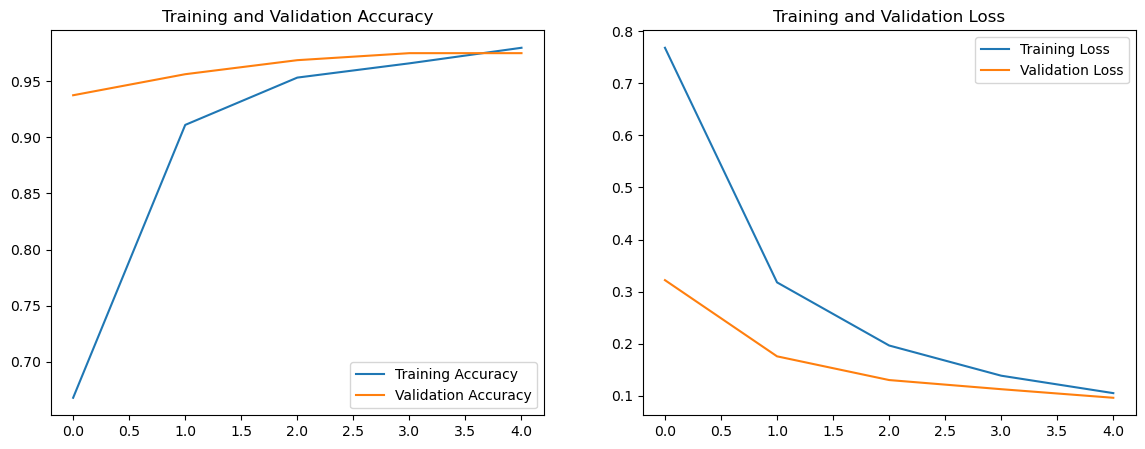

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

10/10 [==============================] - 3s 211ms/step


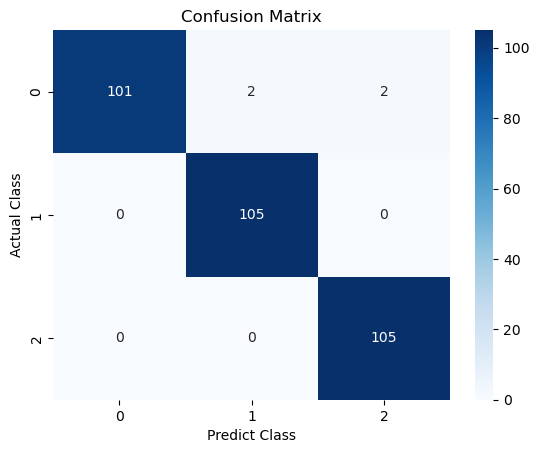

In [44]:
Batch_size = 32

Y_prediction = model.predict(valid_generator, NUM_VALID_DATA//Batch_size+1)
y_prediction = np.argmax(Y_prediction, axis=1)

conf_matrix = confusion_matrix(valid_generator.classes, y_prediction)
confusion_array = sklearn.metrics.confusion_matrix(valid_generator.classes, y_prediction)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel("Predict Class")
plt.show()

In [45]:
print('Classification Report')
target_names = ['Paper', 'Rock', 'Scissors']
print(classification_report(valid_generator.classes, y_prediction, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       Paper       1.00      0.96      0.98       105
        Rock       0.98      1.00      0.99       105
    Scissors       0.98      1.00      0.99       105

    accuracy                           0.99       315
   macro avg       0.99      0.99      0.99       315
weighted avg       0.99      0.99      0.99       315



In [46]:
test_dir = r'D:\Semester 7\Prak ML B\Modul 5\Images\rps\rps_split\test'
paper_dir = os.path.join(test_dir, 'paper')
rock_dir = os.path.join(test_dir, 'rock')
scissors_dir = os.path.join(test_dir, 'scissors')

# Define the target directory where you want to merge the images
target_dir = os.path.join(test_dir, 'merged_test')

# Create the target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# List the files in each subdirectory and move them to the target directory
for subdir in [paper_dir, rock_dir, scissors_dir]:
    for filename in os.listdir(subdir):
        source_path = os.path.join(subdir, filename)
        target_path = os.path.join(target_dir, filename)
        shutil.copy(source_path, target_path)

In [47]:
def get_class(file_name):
    # Split the file path by both forward and backward slashes
    path_components = file_name.split('/')
    path_components.extend(file_name.split('\\'))  # Extend the list with backslash splits

    # Find the last component that is not empty and use it as the class label
    for component in reversed(path_components):
        if component:
            return component
    # Return a default label if the path does not contain a valid class label
    return 'Unknown'

Found 126 images belonging to 3 classes.
1/1 [==============================] - 0s 31ms/step


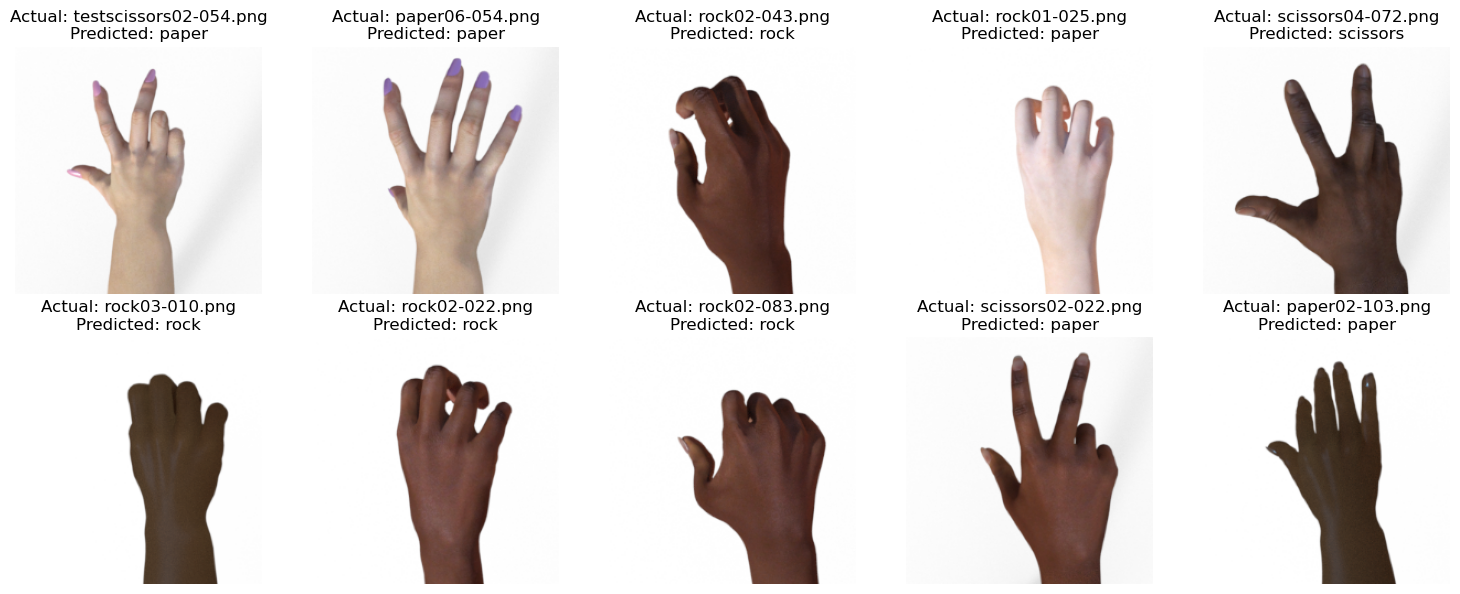

In [48]:
test_dir = r'D:\Semester 7\Prak ML B\Modul 5\Images\rps\rps_split\test'
test_files = os.listdir(test_dir)


test_datagen = ImageDataGenerator(rescale=1.0/255.0)

selected_test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    classes=['paper','rock', 'scissors'],
    shuffle=False
)
random_numbers = [random.randint(0, 126 - 1) for _ in range(10)]
class_labels = list(selected_test_generator.class_indices.keys())

num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    img_path = selected_test_generator.filepaths[random_numbers[i]]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    prediction = model.predict(img.reshape(1, 224, 224, 3))
    predicted_label = class_labels[np.argmax(prediction)]

    actual_label = get_class(img_path)

    ax.imshow(img)
    ax.set_title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## TEXT

1. Import library yang diperlukan
2. Load Dataset
3. Melakukan Exploration Data Analyst
4. Lakukan Pre-processing dan Data Augmentation yang menurut kamu memberikan dataset yang lebih efisien
5. Implementasikan transfer learning dengan menggunakan model **BERT** (Bidirectional Encoder Representations from Transformers) atau lainnya
6. Lakukan Fit Model dengan epoch yang anda tentukan
7. Evaluate Model dengan menampilkan Plot, Loss, Accuracy serta Classification Report
8. Lakukan predict pada data test hasil splitting kemudian lakukan perbandingan antara true label dan predict labelnya
9. Demonstrasikan hasil tersebut kepada esisten

In [142]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Dense, MaxPooling1D, Flatten, LSTM,BatchNormalization
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import EarlyStopping
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from keras.optimizers import Adam

In [143]:
datasetPath = r"D:\Semester 7\Prak ML B\Modul 5\cleaned_reviews.csv"
df = pd.read_csv(datasetPath)
df

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0
...,...,...,...,...
17335,positive,i love this speaker and love can take it anywh...,30,5.0
17336,positive,i use it in my house easy to connect and loud ...,13,4.0
17337,positive,the bass is good and the battery is amazing mu...,41,5.0
17338,positive,love it,2,5.0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17340 entries, 0 to 17339
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sentiments             17340 non-null  object 
 1   cleaned_review         17337 non-null  object 
 2   cleaned_review_length  17340 non-null  int64  
 3   review_score           17340 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 542.0+ KB


In [146]:
df['cleaned_review'].fillna('0', inplace=True)

In [147]:
def preprocessor(text):
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()
        # Remove not word characters or whitespace characters
        text = re.sub(r'[^\w\s]', '', text)
    return text

df['cleaned_review'] = df['cleaned_review'].apply(preprocessor)

#Handle missing values
df['cleaned_review'] = df['cleaned_review'].fillna("")

In [148]:
# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_review'])
sequences = tokenizer.texts_to_sequences(df['cleaned_review'])

max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

word_index = tokenizer.word_index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

#Select a single padded sequence
padded_sequence = padded_sequences[0]

# Convert labels to one-hot encoding and perform oversampling using SMOTE
le = LabelEncoder()
label_encoded = le.fit_transform(df['sentiments'])

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(padded_sequences, label_encoded)

# Convert the oversampled labels to one-hot encoding
label_encoded_categorical = to_categorical(y_resampled)

# Splitting (70% train, 20% validation, 10% test)
x_train, x_temp, y_train, y_temp = train_test_split(x_resampled, label_encoded_categorical, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42)

In [150]:
# SMOTE
resampled_sentiment_counts = pd.Series(y_resampled).value_counts().sort_index()

for token in padded_sequence:
    if token != 0:
        print(f"Token: {token}, Word: {reverse_word_index[token]}")

Token: 24, Word: i
Token: 284, Word: wish
Token: 44, Word: would
Token: 21, Word: have
Token: 696, Word: gotten
Token: 28, Word: one
Token: 2497, Word: earlier
Token: 34, Word: love
Token: 3, Word: it
Token: 4, Word: and
Token: 3, Word: it
Token: 293, Word: makes
Token: 49, Word: working
Token: 16, Word: in
Token: 9, Word: my
Token: 107, Word: laptop
Token: 22, Word: so
Token: 135, Word: much
Token: 768, Word: easier


In [152]:
# GloVe 
glove_embeddings = {}
glove_file_path = r'D:\Semester 7\Prak ML B\Modul 5\glove.6B.100d.txt'  # Update this path to the correct location

with open(glove_file_path, encoding='utf-8') as glove_file:
    for line in glove_file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = coefs

In [153]:
#Define vocabulary size for the embedding layer
vocabulary_size = len(tokenizer.word_index)+1

#Prepare the Embedding layer weights using GloVe embeddings
embedding_dim = 100
embedding_weights = np.zeros((vocabulary_size, embedding_dim))
for word, i in tokenizer.word_index.items():
  embedding_vector = glove_embeddings.get(word)
  if embedding_vector is not None:
    embedding_weights[i] = embedding_vector

In [154]:
# Model with Embedding layer using pre-trained GloVe embeddings
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, weights=[embedding_weights], input_length=max_sequence_length, trainable=True))
model.add(LSTM(64, return_sequences=True, dropout=0.1))
model.add(BatchNormalization())
model.add(LSTM(32, return_sequences=False, dropout=0.1))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

In [157]:
adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=10)

Epoch 1/10
624/624 [==============================] - 223s 354ms/step - loss: 0.7001 - accuracy: 0.6859 - val_loss: 0.6657 - val_accuracy: 0.7194
Epoch 2/10
624/624 [==============================] - 198s 317ms/step - loss: 0.5718 - accuracy: 0.7556 - val_loss: 0.5330 - val_accuracy: 0.7706
Epoch 3/10
624/624 [==============================] - 201s 322ms/step - loss: 0.4973 - accuracy: 0.7930 - val_loss: 0.5041 - val_accuracy: 0.7969
Epoch 4/10
624/624 [==============================] - 199s 318ms/step - loss: 0.4385 - accuracy: 0.8212 - val_loss: 0.5036 - val_accuracy: 0.7992
Epoch 5/10
624/624 [==============================] - 197s 316ms/step - loss: 0.3813 - accuracy: 0.8449 - val_loss: 0.4530 - val_accuracy: 0.8180
Epoch 6/10
624/624 [==============================] - 198s 318ms/step - loss: 0.3448 - accuracy: 0.8634 - val_loss: 0.5142 - val_accuracy: 0.8092
Epoch 7/10
624/624 [==============================] - 198s 317ms/step - loss: 0.3073 - accuracy: 0.8776 - val_loss: 0.4719 -

Test Loss: 0.5414
Test Accuracy: 0.8183


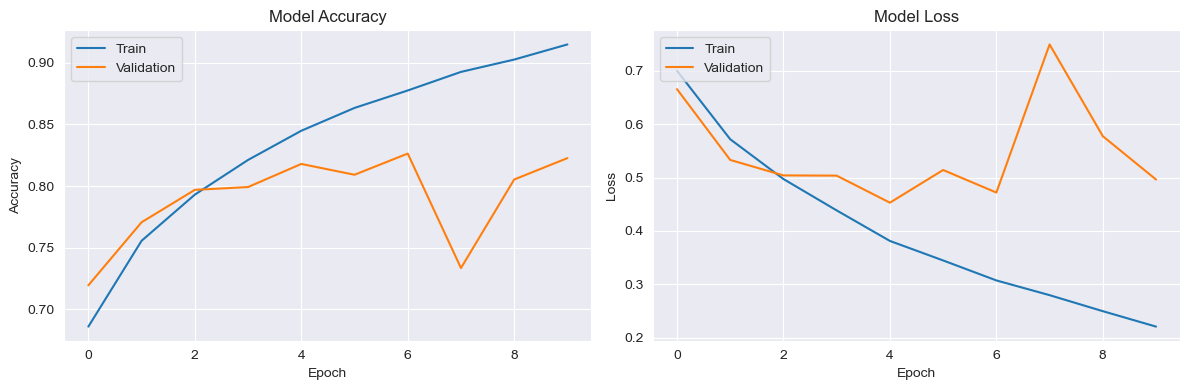

90/90 [==============================] - 7s 80ms/step


In [163]:
# Evaluate the model
def evaluate_model(model, x_test, y_test):
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f'Test Loss: {test_loss:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

    # Plot training history
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    # Make predictions on the test set
    y_pred = model.predict(x_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)

# Call the evaluate_model function
evaluate_model(model, x_test, y_test)


In [161]:
# Get Predictions
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)

# Convert probabilities to class labels
y_train_pred_class = np.argmax(y_train_pred, axis=1)
y_val_pred_class = np.argmax(y_val_pred, axis=1)

# Convert one-hot encoded targets bact to labels
y_train_classes = np.argmax(y_train, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Compute and print classification report for training data
print("Training Data:")
print(classification_report(y_train_classes, y_train_pred_class, target_names=le.classes_))

# Compute and print classification report for validation data
print("Validation data:")
print(classification_report(y_val_classes, y_val_pred_class, target_names=le.classes_))

179/179 [==============================] - 15s 81ms/step
Training Data:
              precision    recall  f1-score   support

    negative       0.91      0.96      0.93      6626
     neutral       0.95      0.90      0.92      6713
    positive       1.00      0.98      0.99      6617

    accuracy                           0.95     19956
   macro avg       0.95      0.95      0.95     19956
weighted avg       0.95      0.95      0.95     19956

Validation data:
              precision    recall  f1-score   support

    negative       0.80      0.83      0.81      1965
     neutral       0.73      0.75      0.74      1815
    positive       0.94      0.89      0.91      1922

    accuracy                           0.82      5702
   macro avg       0.82      0.82      0.82      5702
weighted avg       0.83      0.82      0.82      5702



In [162]:
# Create an empty list to store data
data = []

# Convert class labels back to their original labels
actual_labels = le.inverse_transform(y_val_classes)
predicted_labels = le.inverse_transform(y_val_pred_class)

# Loop through the data and create rows
for text, actual, predicted in zip(y_val, actual_labels, predicted_labels):
    data.append([text, actual, predicted])

# Create a DataFrame from the list of data
results_df = pd.DataFrame(data, columns=['Text', 'Actual Label', 'Predicted Label'])
print(results_df)

                 Text Actual Label Predicted Label
0     [1.0, 0.0, 0.0]     negative        negative
1     [0.0, 1.0, 0.0]      neutral         neutral
2     [1.0, 0.0, 0.0]     negative         neutral
3     [0.0, 0.0, 1.0]     positive        positive
4     [0.0, 0.0, 1.0]     positive        positive
...               ...          ...             ...
5697  [0.0, 0.0, 1.0]     positive        positive
5698  [1.0, 0.0, 0.0]     negative         neutral
5699  [0.0, 0.0, 1.0]     positive        positive
5700  [0.0, 1.0, 0.0]      neutral         neutral
5701  [1.0, 0.0, 0.0]     negative        negative

[5702 rows x 3 columns]


In [160]:
# Predict classes on the test set
y_test_pred = model.predict(x_test)

# Convert probabilities to class labels
y_test_pred_class = np.argmax(y_test_pred, axis=1)

# Convert one-hot encoded targets back to labels
y_test_classes = np.argmax(y_test, axis=1)

# Compute and print classification report for test data
print("Test Data:")
print(classification_report(y_test_classes, y_test_pred_class, target_names=le.classes_))

90/90 [==============================] - 7s 82ms/step
Test Data:
              precision    recall  f1-score   support

    negative       0.77      0.82      0.80       912
     neutral       0.75      0.75      0.75       975
    positive       0.94      0.88      0.91       964

    accuracy                           0.82      2851
   macro avg       0.82      0.82      0.82      2851
weighted avg       0.82      0.82      0.82      2851



## Tabular

1. Import library yang diperlukan
2. Load Dataset
3. Melakukan Exploration Data Analyst
4. Lakukan Pre-processing dan Data Augmentation yang menurut kamu memberikan dataset yang lebih efisien
5. Implementasikan transfer learning dengan menggunakan model **TabNet** atau lainnya
6. Lakukan Fit Model dengan epoch yang anda tentukan
7. Evaluate Model dengan menampilkan Plot, Loss, Accuracy serta Classification Report
8. Lakukan predict pada data test hasil splitting kemudian lakukan perbandingan antara true label dan predict labelnya
9. Demonstrasikan hasil tersebut kepada esisten

In [79]:
!pip install pytorch-tabnet

     ---------------------------------------- 44.5/44.5 kB 1.1 MB/s eta 0:00:00


In [108]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from pytorch_tabnet.tab_model import TabNetClassifier

In [109]:
# 2. Load Dataset
datasetPath = r"D:\Semester 7\Prak ML B\Modul 5\income.csv"
df = pd.read_csv(datasetPath)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [111]:
df['workclass'].fillna('0', inplace=True)
df['occupation'].fillna('0', inplace=True)
df['native-country'].fillna('0', inplace=True)

In [112]:
# Encode fitur kategorikal menggunakan LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [93]:
# Pisahkan fitur dan label
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

In [116]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [127]:
clf = TabNetClassifier()
clf.fit(
    X_train=train_df.drop('income_>50K', axis=1).values,
    y_train=train_df['income_>50K'].values,
    eval_set=[(train_df.drop('income_>50K', axis=1).values, train_df['income_>50K'].values),
              (test_df.drop('income_>50K', axis=1).values, test_df['income_>50K'].values)],
    max_epochs=20
)

epoch 0  | loss: 0.46961 | val_0_auc: 0.54405 | val_1_auc: 0.55576 |  0:00:02s
epoch 1  | loss: 0.36003 | val_0_auc: 0.6403  | val_1_auc: 0.63419 |  0:00:05s
epoch 2  | loss: 0.34613 | val_0_auc: 0.81151 | val_1_auc: 0.80457 |  0:00:07s
epoch 3  | loss: 0.34073 | val_0_auc: 0.86629 | val_1_auc: 0.85726 |  0:00:10s
epoch 4  | loss: 0.33641 | val_0_auc: 0.87729 | val_1_auc: 0.86896 |  0:00:12s
epoch 5  | loss: 0.33451 | val_0_auc: 0.88759 | val_1_auc: 0.87972 |  0:00:15s
epoch 6  | loss: 0.33399 | val_0_auc: 0.88881 | val_1_auc: 0.8833  |  0:00:17s
epoch 7  | loss: 0.33301 | val_0_auc: 0.89758 | val_1_auc: 0.88928 |  0:00:20s
epoch 8  | loss: 0.33028 | val_0_auc: 0.90224 | val_1_auc: 0.89391 |  0:00:22s
epoch 9  | loss: 0.32899 | val_0_auc: 0.90284 | val_1_auc: 0.89487 |  0:00:25s
epoch 10 | loss: 0.33032 | val_0_auc: 0.90191 | val_1_auc: 0.89541 |  0:00:27s
epoch 11 | loss: 0.32575 | val_0_auc: 0.90199 | val_1_auc: 0.89459 |  0:00:30s
epoch 12 | loss: 0.32423 | val_0_auc: 0.90197 | val_

In [134]:
# Assuming clf is your TabNetClassifier instance
y_train_pred = clf.predict(train_df.drop('income_>50K', axis=1).values)
y_test_pred = clf.predict(test_df.drop('income_>50K', axis=1).values)

# Training set evaluation
train_accuracy = accuracy_score(train_df['income_>50K'].values, y_train_pred)
train_classification_report = classification_report(train_df['income_>50K'].values, y_train_pred)

# Print or use the evaluation metrics as needed
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:\n", train_classification_report)

Training Accuracy: 0.851642257926916
Training Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     26783
           1       0.77      0.54      0.63      8382

    accuracy                           0.85     35165
   macro avg       0.82      0.74      0.77     35165
weighted avg       0.84      0.85      0.84     35165



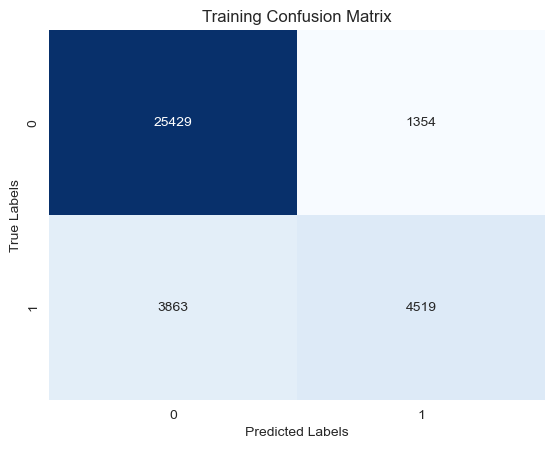

In [135]:
# Visualisasi Confusion Matrix
sns.heatmap(train_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Training Confusion Matrix')
plt.show()

In [136]:
# Test set evaluation
test_accuracy = accuracy_score(test_df['income_>50K'].values, y_test_pred)
test_classification_report = classification_report(test_df['income_>50K'].values, y_test_pred)

print("\nTest Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_classification_report)


Test Accuracy: 0.8467925386715196
Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      6656
           1       0.77      0.52      0.62      2136

    accuracy                           0.85      8792
   macro avg       0.82      0.74      0.76      8792
weighted avg       0.84      0.85      0.84      8792



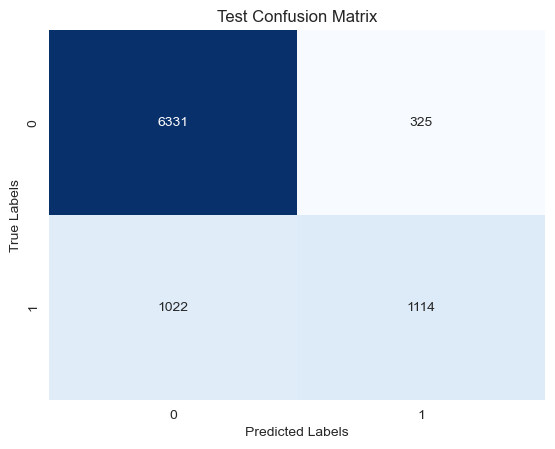

In [137]:
# Visualisasi Confusion Matrix Test
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Confusion Matrix')
plt.show()